# Math 104A Homework 2
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
**(a)** *Write the Lagrangian form of the interpolating polynomial $P_2(x)$ corresponding to the given table* <br>
<br>
> From lecture, we know we can write $P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f_0 + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f_1 + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f_2$. From the given table we can subsitute in each $x_j$ with the corresponding$f(x_j)$, since the interpolation property for $P_2(x)$ states the following: $$ $$
$$P_2(x_0) = f_0$$ $$P_2(x_1) = f_1$$ $$P_2(x_2) = f_2$$ $$ $$ We can define $l^{(2)}_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}$, $l^{(2)}_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}$, $l^{(2)}_2 =  \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$ and write $P_2(x) = l^{(2)}_0 f_0 + l^{(2)}_1 f_1 + l^{(2)}_2 f_2$. Evaluate each $l^{(2)}_j$ and we have $l^{(2)}_0 = \frac{(x-1)(x-3)}{3}$, $l^{(2)}_1 = \frac{(x-0)(x-3)}{-2}$, $l^{(2)}_2 = \frac{(x-0)(x-1)}{6}$. Thus $P^2(x) = \frac{(x-1)(x-3)}{3} + \frac{(x-0)(x-3)}{-2} + \frac{(x-0)(x-1)}{6}(-5)$.

**(b)** *Use $P_2(x)$ from **(a)** to approximate $f(2)$*<br>
<br>
> From part (a) we obtained $P^2(x) = \frac{(x-1)(x-3)}{3} + \frac{(x-0)(x-3)}{-2} + \frac{(x-0)(x-1)}{6}(-5)$. Let's subsitute $x$ with $2$ to approximate $f(2)$, $P^2(2) = \frac{(2-1)(2-3)}{3} + \frac{(2-0)(2-3)}{-2} + \frac{(2-0)(2-1)}{6}(-5)$. After some simple calculation we end with $P^2(2) = -1$.


## Exercise 2

**(a)** *In the following cell, we will implement the Barycentric Formula for evaluating the interpolating polynomial for arbitarily distributed notes $x_0, \cdots , x_n$.* 


In [241]:
# Function implementation for Barycentric Weights 
def weight(j, x_col): 
    result = 1
    for i in range(0, len(x_col)):
        if(i != j):
            result *= x_col[j] - x_col[i]
    return 1.0/result

# Complete Barycentric Formula 
def barycentric(x, x_col, func):
    sigma1 = 0; #numerator 
    sigma2 = 0; #denominator 
    for i in range(0, len(x_col)):
        sigma1 += (weight(i, x_col))/(x-x_col[i])*func[i]
        sigma2 += (weight(i, x_col))/(x-x_col[i])
    
    return sigma1/sigma2
    

**(b)** *In the following cell, we will use code from **(a)** to find $P_5(2)$ as an approximation of $f(2)$*

In [242]:
# initialize our x and f 
x = [0.00, 0.25, 0.50, 0.75, 1.25, 1.50]
func = [0.0000, 0.7071, 1.0000, 0.7071, -0.7071, -1.0000]

print("Value of P_5(2) as an apprximation of f(2):", barycentric(2, x, func))

Value of P_5(2) as an apprximation of f(2): 0.8519999999999989


## Exercise 3
We are given $f(x) = \frac{1}{1+x^2}$, $x\in[-5,5]$<br>

**(a)** *equidistributed nodes $x_j = -5 + j(\frac{10}{n}), j = 0, \cdots, n$ for $n = 4, 8, 12.$*

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher

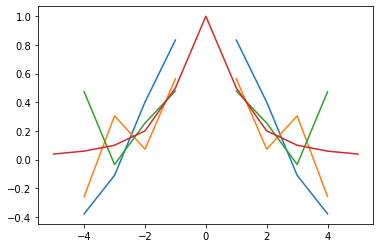

In [243]:
import matplotlib.pyplot as plt
import math
import numpy as np

def equalWeight(n, j):
    return ((-1)**j)*(math.factorial(n)/(math.factorial(j)*math.factorial(n-j)))

def equalBary(x, x_col, func, n):
    sigma1 = 0; 
    sigma2 = 0; 
    for i in range(0, len(x_col)):
        sigma1 += ((equalWeight(n, i))/(x-x_col[i]))*func[i]
    for i in range(0, len(x_col)):
        sigma2 += (equalWeight(n, i))/(x-x_col[i])
    return sigma1/sigma2

#build x_j for part a
def build(x, n):
    for i in range(n+1):
        x.append(-5+i*(10.0/n))
        
#build x_j for part b
def buildB(x, n):
    for i in range(n+1):
        a = (math.pi*i)/n
        x.append(5*math.cos(a))
        
#func for part a
def func(f, x):
    for i in range(len(x)):
         f.append(1/(1+(x[i]**2)))

#func for part c
def funcC(f, x):
    for i in range(len(x)):
        a = (-1*x[i]**2)/5.0
        f.append(math.exp(a))
#############################For Part A##################################        
#list for when n = 4        
x1 = []
build(x1, 4)
f1=[]
func(f1, x1)

#list for when n = 8
x2 = []
build(x2, 8)
f2 = []
func(f2, x2)

#list for when n = 12
x3 = []
build(x3, 12)
f3 = []
func(f3, x3)

xc = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
fc = []
funcC(fc, xc)

##########################################################################

#############################For Part A################################## 
#list for when n = 4
xb1 = []
buildB(xb1, 4)
fb1 = []
func(fb1, xb1)

#list for when n = 8
xb2 = []
buildB(xb2, 8)
fb2 = []
func(fb2, xb2)

#list for when n = 12
xb3 = []
buildB(xb3, 12)
fb3 = []
func(fb3, xb3)

#list for when n = 100
xb4 = []
buildB(xb4, 100)
fb4 = []
func(fb4, xb4)
#########################################################################

#function and x 
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
f = [0.03846153846, 0.05882352941, 0.1, 0.2, 0.5, 1, 0.5, 0.2, 0.1, 0.05882352941, 0.03846153846]

a = np.array(range(-5,6))
b1 = equalBary(a, x1, f1, 4)
plt.plot(a,b1)

b2 = equalBary(a, x2, f2, 8)
plt.plot(a, b2)

b3 = equalBary(a, x3, f3, 12)
plt.plot(a, b3)

plt.plot(x, f)
plt.show()

The red line is $f(x)$, blue line is when n = 4, orange is when n = 8, and green is when n = 12.

**(b)** *In the following cell I will graph the result*

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher

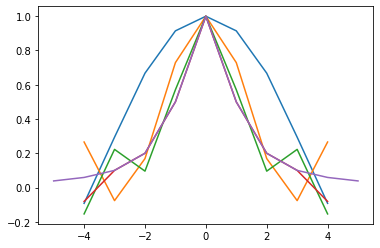

In [244]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
f = [0.03846153846, 0.05882352941, 0.1, 0.2, 0.5, 1, 0.5, 0.2, 0.1, 0.05882352941, 0.03846153846]

a = np.array(range(-5,6))
b1 = equalBary(a, xb1, fb1, 4)
plt.plot(a,b1)

b2 = equalBary(a, xb2, fb2, 8)
plt.plot(a, b2)

b3 = equalBary(a, xb3, fb3, 12)
plt.plot(a, b3)

b4 = equalBary(a, xb4, fb4, 100)
plt.plot(a,b4)
plt.plot(x, f)
plt.show()

Purple line is f(x), blue line is when n = 4, orange line is when n = 8, green line is when n = 12, and red line is when n = 100. Red line is hard to see as it's nearly blended with f(x), purple line, which is what we would expect to see.

**(c)** In the following cell I will graph the result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher

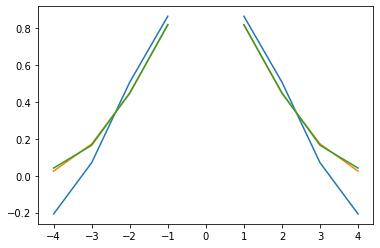

In [248]:
a = np.array(range(-5,6))
fc1=[]
funcC(fc1, x1)
b1 = equalBary(a, x1, fc1, 4)
plt.plot(a,b1)

fc2=[]
funcC(fc2, x2)
b2 = equalBary(a, x2, fc2, 8)
plt.plot(a, b2)

fc3=[]
funcC(fc3, x3)
b3 = equalBary(a, x3, fc3, 12)
plt.plot(a, b3)

#plt.plot(xc, fc)
plt.show()

I didn't graph f(x) because it made it more difficult to see the orange and green lines. If we look carefully, we can only see a marginal difference between the orange and green line. This makes sense because as we increase n, it should also be more accurate. 